# Решение практической задачи 1.2.16 по курсу Вычислительной математики
#### Подготовил студент 3-го курса ФРКТ
#### Токарев Андрей


In [ ]:
import math
import matplotlib.pyplot as plt

# Машинное епилон
В следующем блоке кода вычисляем машинное епсилон двумя способами:
 - удвоением знаменателя дроби;
 - увеличением максимально достигнутого знаменателя, при котором не выполняется равенство $1 = 1 + \frac1n$ и увеличиваем знаменатель на единицу до выполнения равенста.

In [ ]:
"""
    Вычисление машинного эпсилон через цикл.
"""
n = 1
k = 0
while 1 != 1 + 1/n:
    n *= 2
    k += 1

epsilon = 1/n
print(n)
print("Количество бит в мантисе: {}.\n".format(k))
print(type(epsilon))

print("Вычисление путем удвоения знаменателя: {}.\n".format(epsilon))

n = n/2
k -= 1
while 1 != 1 + 1/n:
    n += 10**8
    k += 1

epsilon = 1/n

print(n)
print(k)
    
print("Вычисление путем приближения увеличенного знаменателя: {}.".format(epsilon))

9007199254740992
Количество бит в мантисе: 53.

<class 'float'>
Вычисление путем удвоения знаменателя: 1.1102230246251565e-16.

9007199327370496.0
45036049
Вычисление путем приближения увеличенного знаменателя: 1.1102230156728791e-16.


Заметим, что при попытке более точного вычисления машинного эпсилон у нас ничего более правильного не получилось, то примем $e = 10^{-16}.$

# Основная часть

## Введение формулы члена ряда и суммирование ряда
$$S_N = \sum\limits_{n=0}^N \frac {32} {n^2 + 5n + 6}$$

In [ ]:
def memderOfSequence(n):
    rez = 32
    rez /= (n + 2)
    rez /= (n + 3)
    return rez

def summOfSequence(N):
    rez = 0
    for i in range(N + 1):
        rez += memderOfSequence(i)
    
    return rez

def CalculationTheError (N):
    rez = 0
    for i in range(N + 1):
        rez += memderOfSequence(i)*epsilon
    
    return rez

## Аналитическое решение

$$
  S_N = \sum\limits_{n=0}^N \frac {32} {n^2 + 5n + 6} = 
  32 \sum\limits_{n=0}^N \frac 1 {n^2 + 5n + 6} = 
  32 \sum\limits_{n=0}^N \frac 1 {(n + 2)(n + 3)} =
$$
$$
  32 \sum\limits_{n=0}^N \frac 1 {n + 2} - \frac 1 {n + 3} = 
  32 (\frac12 - \frac13 + \frac13 - \frac14 + \frac14 - ... -\frac 1 {N + 3}) = 
  32 (\frac12 - \frac 1 {N + 3})
$$
При устремлении $N \to \infty$, получим $S = 32(\frac12 - \frac 1 {N + 3}) = 16.$

Таким образом мы вычислили точное значение суммы ряда, а также привели формулу для точного аналитического нахождения частичной суммы ряда.

In [ ]:
def partialSumOfSequence(N):
    rez = 16 - 32/(N + 3)
    return rez

## Решение задачи через и вычисление погрешностей

In [ ]:
lst = range(1, 6)
print("Массив для вычисления погрешности: {}\n\n".format(list(lst)))

power_List = list()
power = 0

for i in lst:
    absolute = partialSumOfSequence(10**i)
    recieved = summOfSequence(10**i)
    delta = abs(absolute - recieved)
    Error = CalculationTheError(10**i)
    
    print("Погрешность вычислений при N = 10**{}: ".format(i))
    print("     absolute value = {0:5.16f}".format(absolute))
    print("     recieved value = {0:5.16f}".format(recieved))
    print("     Computation error = {0:10e}".format(Error))
    print("     Real error = {0:10e}".format(delta))
    print("\n")


    if delta != 0:
        power = 0
        while (int(delta) < 1):
            delta *= 10
            power += 1
    
    power_List.append(power)

Массив для вычисления погрешности: [1, 2, 3, 4, 5]


Погрешность вычислений при N = 10**1: 
     absolute value = 13.5384615384615383
     recieved value = 13.5384615384615365
     Computation error = 1.503071e-15
     Real error = 1.776357e-15


Погрешность вычислений при N = 10**2: 
     absolute value = 15.6893203883495147
     recieved value = 15.6893203883495147
     Computation error = 1.741864e-15
     Real error = 0.000000e+00


Погрешность вычислений при N = 10**3: 
     absolute value = 15.9680957128614160
     recieved value = 15.9680957128613912
     Computation error = 1.772815e-15
     Real error = 2.486900e-14


Погрешность вычислений при N = 10**4: 
     absolute value = 15.9968009597120862
     recieved value = 15.9968009597120755
     Computation error = 1.776002e-15
     Real error = 1.065814e-14


Погрешность вычислений при N = 10**5: 
     absolute value = 15.9996800095997127
     recieved value = 15.9996800095994320
     Computation error = 1.776321e-15
     Real 

Таким образом, мы видим, что ошибка для различных случачев составляет не более $2*10^{-15}$.

В случае N = 100 можно попробовать найти момент, когда будут различаться точное и полученное значения. На данном этапе все числа представлены с точностью до 16 знака после запятой.

Далее построим график зависимости степени ошибки от степени 10 в пробной выборке:

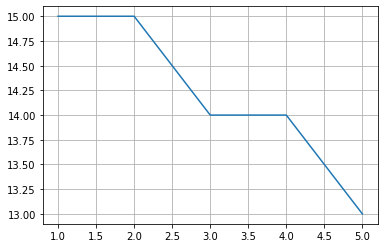

In [ ]:
plt.plot(lst, power_List)
grid1 = plt.grid(True)

plt.show()

Мы видим, что с увеличением количества членов в сумме ошибка увеличивается, а количество верных цифр в числе уменьшается.

# 24.09.2020

# г. Долгопрудный